
<figure>
<img src="/work/Modulo3_Taller2/fig/ISEADE LOGO Y ESCUDO.png" align="center"/> 
</figure> 

# Taller 2 

## Importación de módulos

In [ ]:
!pip install statsmodels==0.12.2

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans

import statsmodels.formula.api as sfm
import statsmodels.api as sm

## Importación de Datos

In [ ]:
df_customers = pd.read_csv('/work/Modulo3_Caso2/data/Customers.csv',sep='\t')
df_customers.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


## Problema de Negocio

El contexto de este problema de negocio es la introducción de un nuevo producto. La organización para cual usted trabaja desarrolló un nuevo producto y lo ha promocionado entre sus clientes actuales. La organización está interesada en construir un modelo para seleccionar las características que poseen los clientes que mejor responden a las promociones ofertadas.

## Análisis Exploratorio de Datos

### DICCIONARIO DE DATOS

Las tablas de datos suelen ir acompañadas de un diccionario de datos que explica el contenido de la información contenida en una de las columnas y, en ocasiones, proporciona algún contexto empresarial. 

#### Gente

- Year_Birth: año de nacimiento del cliente
- Education: nivel de educación del cliente
- Marital_Status: estado civil del cliente
- Income: ingresos familiares anuales del cliente
- Kidhome: Número de niños en el hogar del cliente
- Teenhome: Número de adolescentes en el hogar del cliente
- Recency: Número de días desde la última compra del cliente

#### Productos

- MntWines: Cantidad gastada en vino en los últimos 2 años
- MntFruits: Cantidad gastada en frutas en los últimos 2 años
- MntMeatProducts: cantidad gastada en carne en los últimos 2 años
- MntFishProducts: cantidad gastada en pescado en los últimos 2 años
- MntSweetProducts: cantidad gastada en dulces en los últimos 2 años
- MntGoldProds: cantidad gastada en oro en los últimos 2 años


#### Promoción

- NumDealsPurchases: Número de compras realizadas con descuento
- AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
- AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
- AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ra campaña, 0 en caso contrario
- AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
- AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
- Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
- Total_Accepted: Cantidad total de ofertas aceptadas por cada cliente

#### Lugar

- NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
- NumCatalogPurchases: Número de compras realizadas utilizando un catálogo
- NumStorePurchases: Número de compras realizadas directamente en tiendas
- NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes 

## Limpieza de datos

In [ ]:
remove_list = ['YOLO','Absurd','Alone']
df_customers = df_customers[~df_customers['Marital_Status'].isin(remove_list)]

df_customers= df_customers[df_customers['Year_Birth']>1930]

df_customers= df_customers[df_customers['Income']<100000]

df_customers= df_customers[df_customers['NumWebVisitsMonth']<12]

df_customers= df_customers[df_customers['Complain']<1]

df_customers['Total_Accepted'] = df_customers['AcceptedCmp1'] + df_customers['AcceptedCmp2'] + df_customers['AcceptedCmp3'] + df_customers['AcceptedCmp4'] + df_customers['AcceptedCmp5']

df_customers.drop(columns=['Complain', 'Z_CostContact','Z_Revenue','ID','Dt_Customer'],inplace = True)

df_customers['Education'].replace(['Basic','Graduation','2n Cycle','Master', 'PhD'],[0, 1, 2 , 3 , 4 ], inplace=True)

In [ ]:
df_customers_dummies = pd.get_dummies(df_customers['Marital_Status'])
df_customers = pd.concat([df_customers,df_customers_dummies],axis=1)
df_customers.drop(columns = ['Marital_Status'],inplace=True)

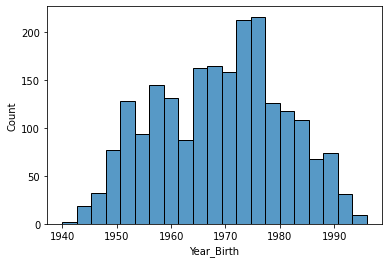

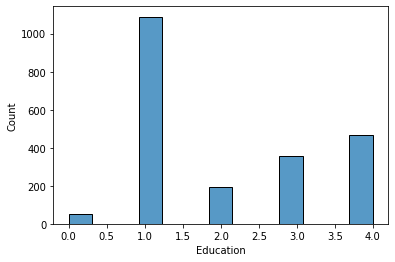

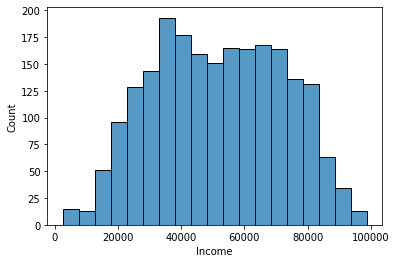

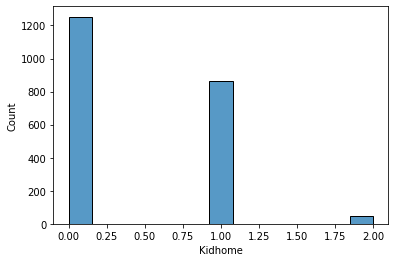

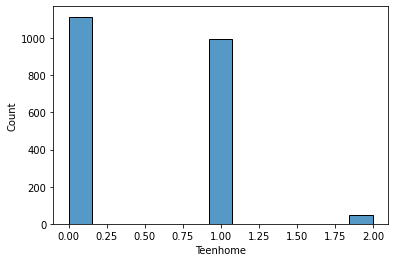

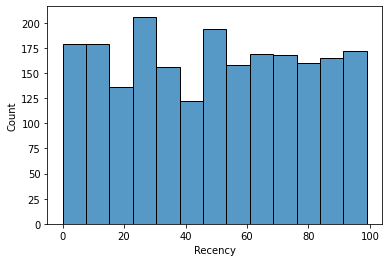

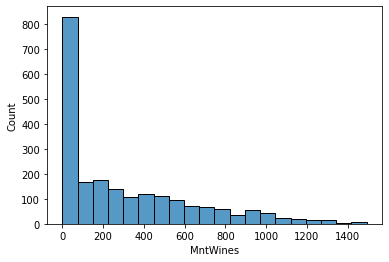

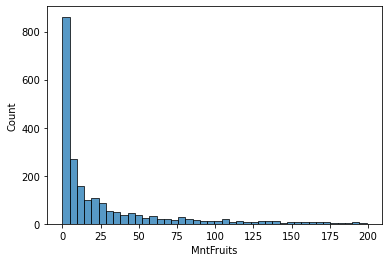

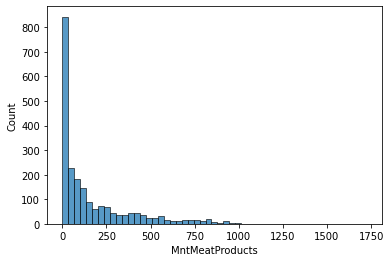

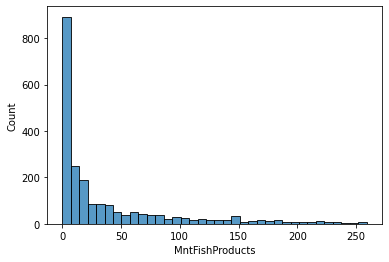

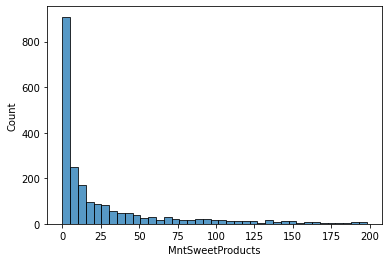

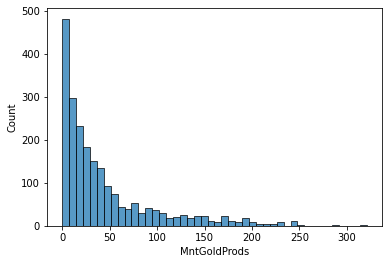

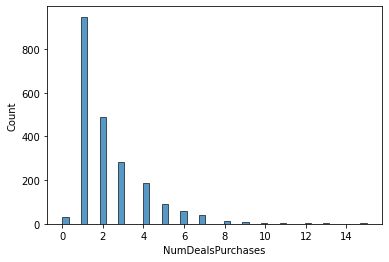

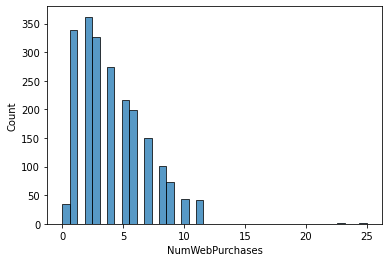

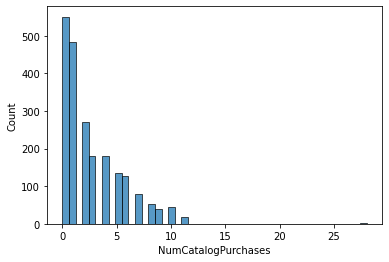

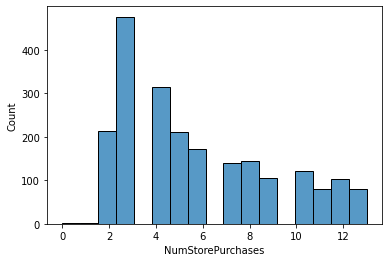

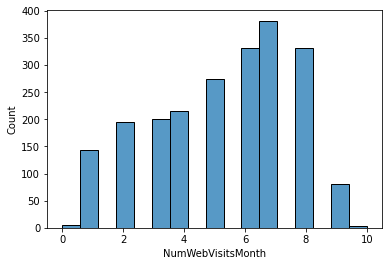

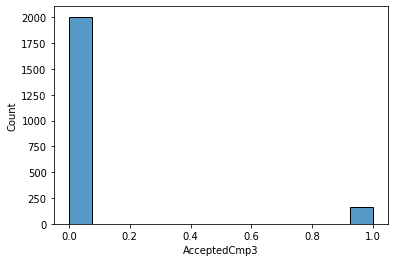

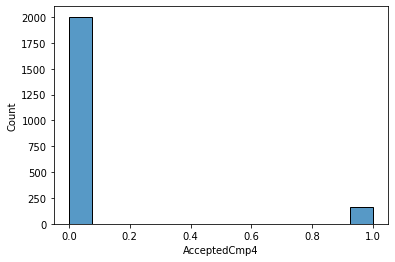

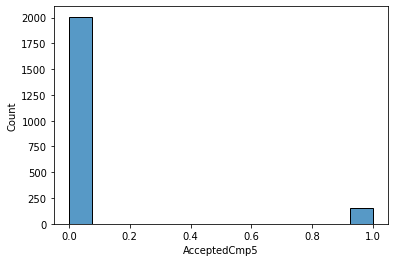

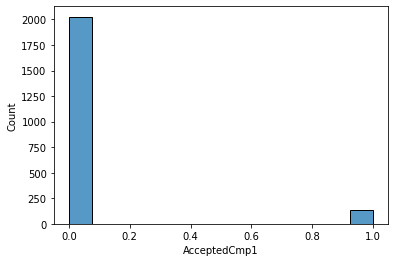

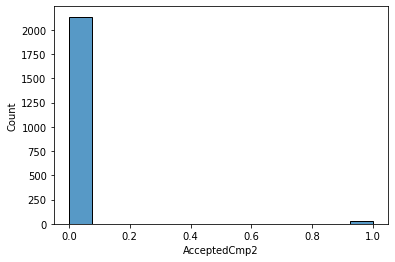

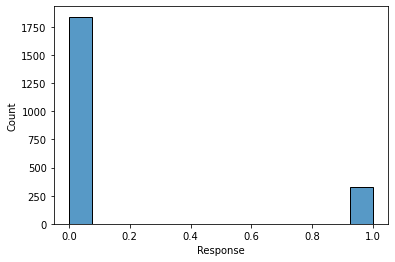

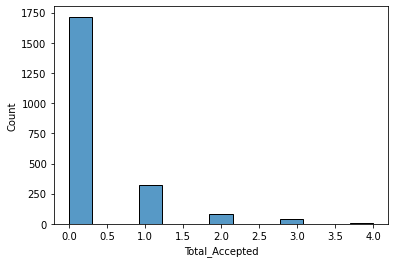

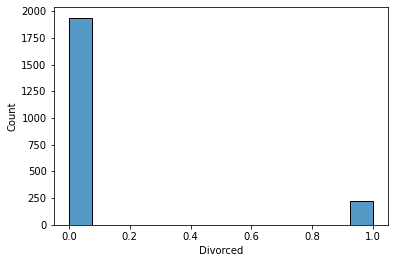

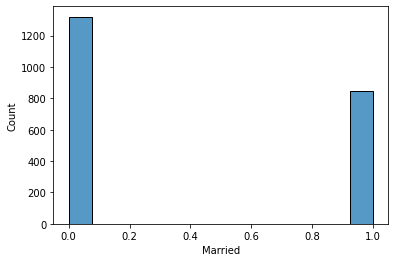

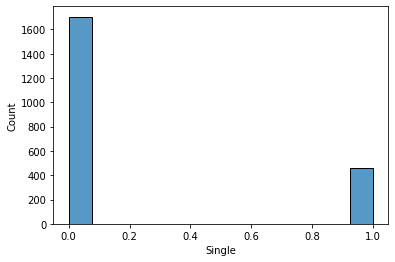

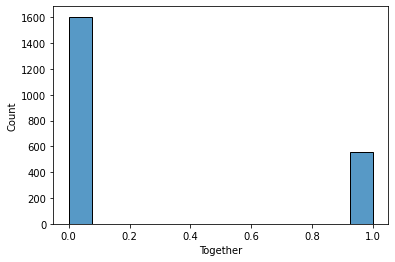

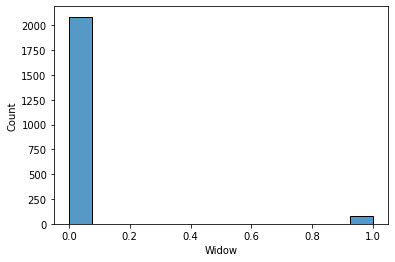

In [ ]:
for column in df_customers.columns:
    sns.histplot(x= column,data = df_customers)
    plt.show()

## Parte 1: Modelo de agrupamiento



In [ ]:
df_customers_KMeans = df_customers.copy()

for column in df_customers.columns:
    scaler = MinMaxScaler()
    df_customers_KMeans[column] = scaler.fit_transform(df_customers[column].values.reshape(-1,1))
df_customers_KMeans.head(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Accepted,Divorced,Married,Single,Together,Widow
0,0.303571,0.25,0.578127,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.250000,0.25,0.455694,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.446429,0.25,0.718011,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.785714,0.25,0.251209,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.732143,1.00,0.579736,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


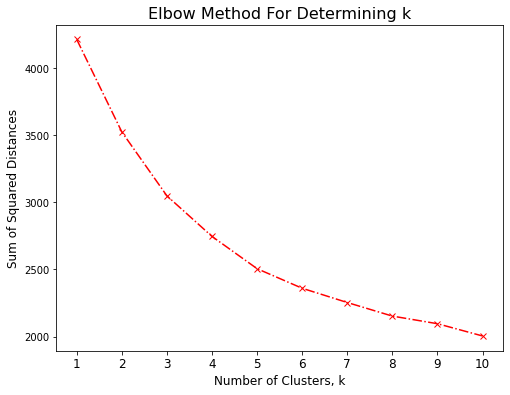

In [ ]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_customers_KMeans)
    sum_sq_d.append(km.inertia_)
    
plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()

In [ ]:
k = 5

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_customers_KMeans)
labels = kmeans.predict(df_customers_KMeans)

df_customers_KMeans['labels']=labels

df_customers_KMeans_grouped = df_customers_KMeans.groupby(['labels']).mean()
df_customers_KMeans_grouped['label'] = [0,1,2,3,4]
df_customers_KMeans_grouped.head(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Total_Accepted,Divorced,Married,Single,Together,Widow,label
labels,,,,,,,,,,,,,,,,,,,,,
0,0.474763,0.540462,0.709808,0.037572,0.242775,0.482630,0.400371,0.269207,0.191112,0.281797,...,0.179191,0.020231,0.179191,0.156792,0.000000,1.0,0.0,0.0,0.000000,0
1,0.439096,0.538907,0.532422,0.185430,0.306291,0.497993,0.228577,0.143566,0.093049,0.151896,...,0.052980,0.016556,0.215232,0.075331,0.748344,0.0,0.0,0.0,0.251656,1
2,0.564387,0.491830,0.504112,0.226580,0.202614,0.499967,0.197097,0.137945,0.108226,0.151782,...,0.063181,0.010893,0.222222,0.070806,0.000000,0.0,1.0,0.0,0.000000,2
3,0.497828,0.507603,0.509905,0.226297,0.265653,0.507653,0.207380,0.126689,0.095840,0.150614,...,0.053667,0.021467,0.103757,0.071556,0.000000,0.0,0.0,1.0,0.000000,3
4,0.566516,0.495482,0.370595,0.358434,0.263052,0.487810,0.065439,0.032774,0.023043,0.038145,...,0.000000,0.000000,0.072289,0.021586,0.000000,1.0,0.0,0.0,0.000000,4


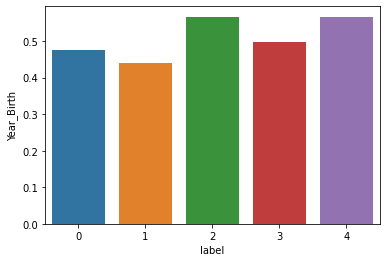

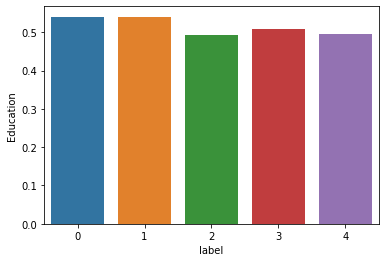

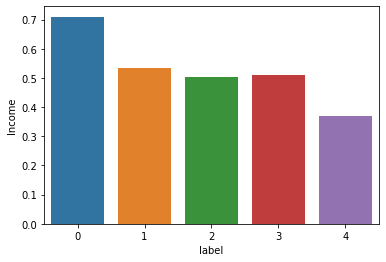

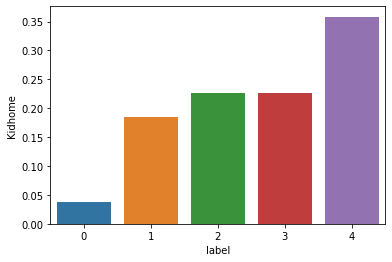

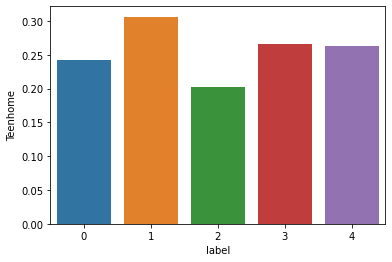

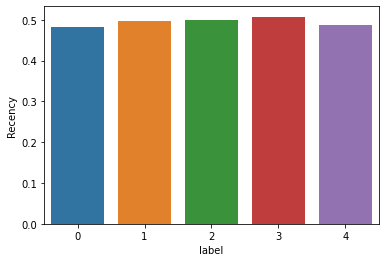

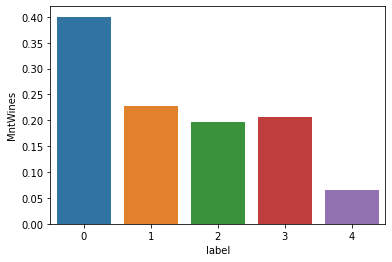

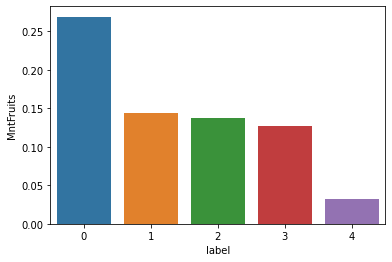

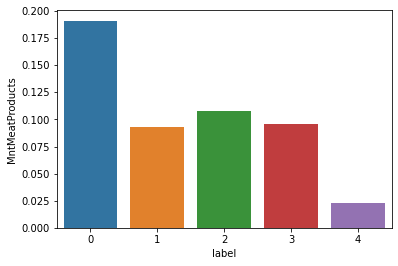

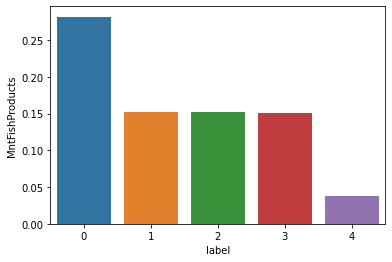

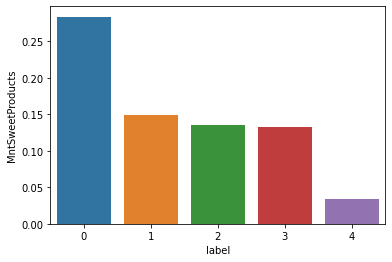

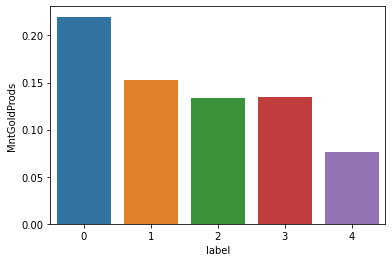

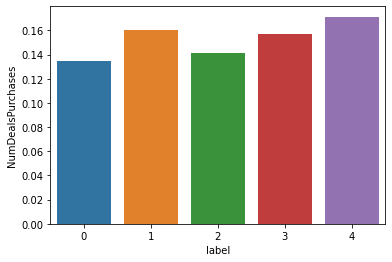

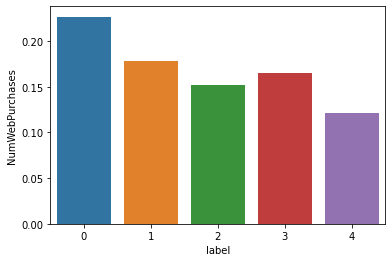

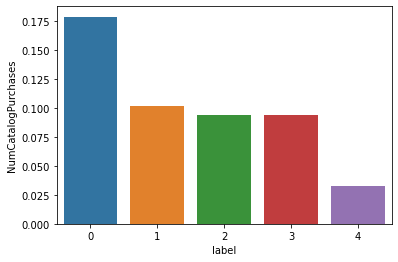

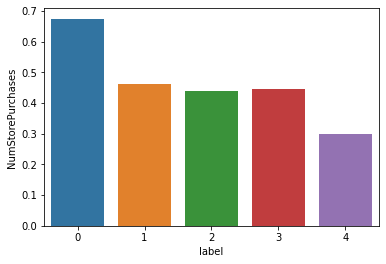

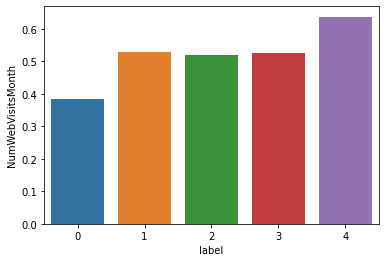

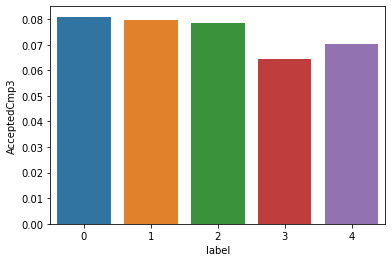

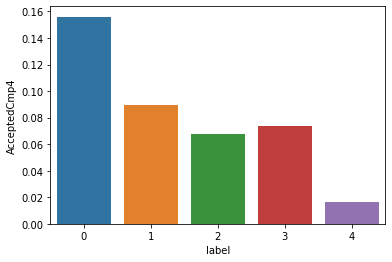

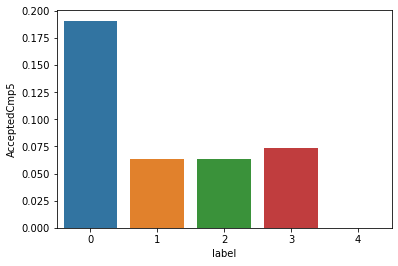

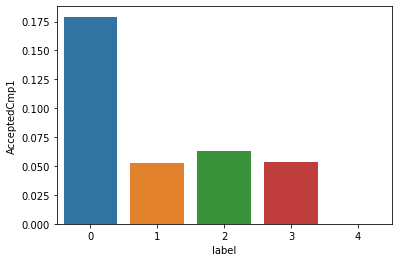

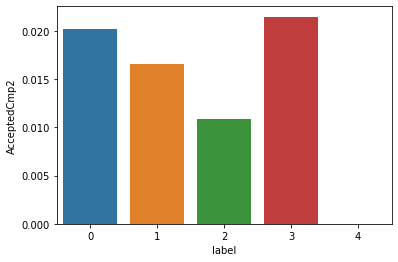

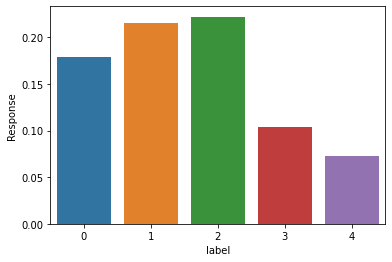

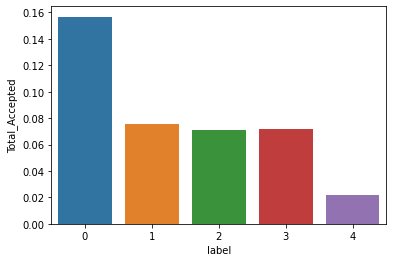

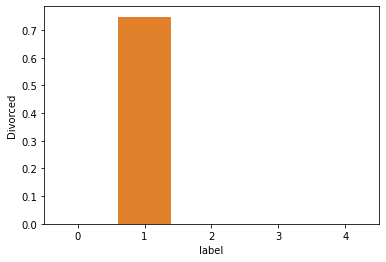

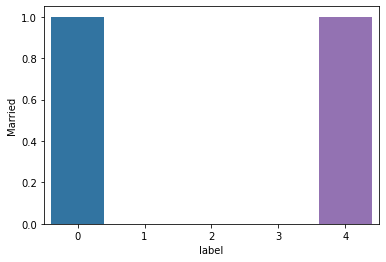

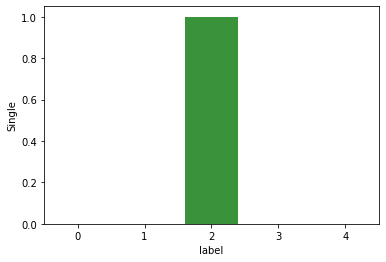

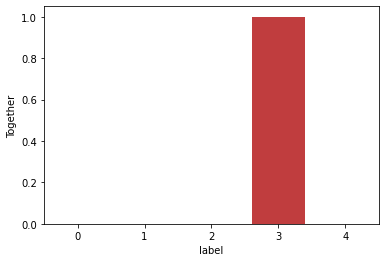

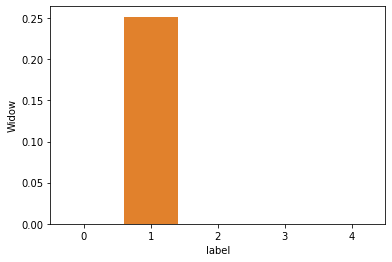

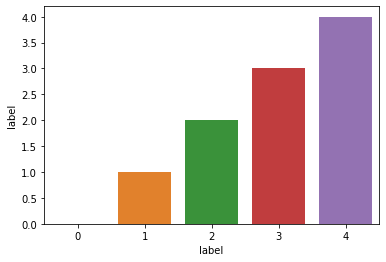

In [ ]:
for column in df_customers_KMeans_grouped.columns:
    sns.barplot(x = 'label', y = column ,data = df_customers_KMeans_grouped) 
    plt.show()

## Ejercicio # 1 (20%)

Basándose en el modelo de agrupamiento K-means construido, realizar la explicación de qué tipo de clientes están representados en cada uno de los grupos.

**Respuesta**

## Ejercicio # 2 (15%)

¿Cuáles son las características del tipo de cliente que responde de forma más positiva a las promociones? ¿Qué recomendación realizaría para poder seguir teniendo esta buena respuesta, o incluso incrementarla?

**Respuesta**

## Ejercicio # 3 (15%)

¿Cuáles son las características del tipo de cliente que responde de forma menos positiva a las ofertas? ¿Qué recomendación realizaría para poder mejorar esta respuesta?

**Respuesta**

## Ejercicio # 4 (15%)

Tome un tipo de cliente (categoría) que responde de intermedia a las ofertas ¿Cuáles son las características de este cliente? ¿Qué recomendación realizaría para poder mejorar esta respuesta?

**Respuesta**

## Parte 2: Modelo de Regresión


In [ ]:
#Definition of input variables
X = df_customers.drop(columns=['Response'])
#Definition of output variable
y = df_customers['Response']

#Building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

#Printing the summary table
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.259990
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2164
Model:                          Logit   Df Residuals:                     2137
Method:                           MLE   Df Model:                           26
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:                  0.3831
Time:                        22:45:17   Log-Likelihood:                -562.62
converged:                       True   LL-Null:                       -911.96
Covariance Type:            nonrobust   LLR p-value:                1.366e-130
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.0080      0.007     -1.090      0.276      -0.022       0.006
Ed

## Ejercicio # 5 (20%)

Basándose en el modelo de regresión logística realizado ¿Que característica considera importante para tener en cuenta a la hora de predecir si una persona va a responder a la oferta enviada?

**Respuesta**

## Ejercicio # 6 (15%)

Basándose en las características mencionadas anteriormente ¿Qué recomendación le pudiera dar a la empresa a la hora de hacer las ofertas y poder aumentar las respuestas de los clientes?

**Respuesta**

### Ejercicio Bono

Será posible obtener puntos extra en la calificación de este taller (Un máximo de 1 punto sobre 10) realizando correctamente el siguiente ejercicio:


Utilizar estos mismos datos en excel (enviado como adjunto en el correo) para realizar una regresión lineal de las características de los clientes (X) contra el total de ofertas respondidas por el cliente (Y). Explicar estos resultados en el contexto del negocio.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bb6c849-6b4b-49a2-8775-80ecb8e8b9b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>